### Распределения

In [37]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
from scipy.stats import gamma, norm, bernoulli

#### Случайная величина

Случайная величина — переменная, значения которой представляют собой численные исходы некоторого случайного феномена или эксперимента. Другими словами, это численное выражение результата случайного события.

Примеры: 
    1. Бросок монеты
    2. Бросок кости
    3. Время от учебы до дома 
    4. Время проверки самостоятельных
    5. ...

#### Функция вероятности

Функция, возвращающая вероятность того, что дискретная случайная величина примет определённое значение.

### Какие бывают распределения?

#### Биномиальное распределение
$$p(x |\theta) = {n \choose k} \theta^k (1 - \theta)^{n - k}$$

#### Нормальное распределение
$$p(x | \mu, \sigma) = \frac{1}{\sigma \sqrt{2\pi}} \exp{(\frac{(x - \mu)^2}{2 \sigma^2})}$$

#### Гамма распределение
$$\Gamma(x|\alpha, \beta) =  \frac{\beta^\alpha}{\Gamma(\alpha)} x^{\alpha-1} \exp(-\beta x),$$


### Оценка параметров

#### Метод моментов

Идея простая. Если мы хотим определить параметры некоторого распределения $p(x | \theta)$, то давайте приравняем моменты данного распределения к моментам подсчитанным по данным($X = \{ x_1, \dots, x_n \}$) и решим уравнения относительно данных моментов.

Моменты по данным считаются следующим образом:

$$\hat{\mu}_k = \frac{1}{n} \sum\limits_{i=1}^{n} x_i^k$$
Моменты распределений:

$$\mu_k = \sum\limits_{i=1}^{n} x^k p(x | \theta) dx$$



Рассмотрим нормальное распределение:

$$p(x | \mu, \sigma) = \frac{1}{\sigma \sqrt{2\pi}} \exp{(\frac{(x - \mu)^2}{2 \sigma^2})}$$


Тут все довольно просто: 

**Решаем у доски**

Давайте рассмотрим случай посложнее, с гамма распределением. Среднее и дисперсия гамма-распределения:

$$\mu(\Gamma) = \frac{\alpha}{\beta}$$

$$Var(\Gamma) = \frac{\alpha}{\beta^2}$$

Применяем метод моментов:

$$\hat{\mu}_1 = \frac{\alpha}{\beta}$$

$$\hat{\mu}_2 = \frac{\alpha^2}{\beta^2} + \frac{\alpha}{\beta^2}$$

Решая систему уравнений получаем:

$$\beta = \frac{\hat{\mu}_1}{\hat{\mu}_2 - \hat{\mu}_1^2}$$

$$\alpha = \hat{\mu}_1 \beta$$

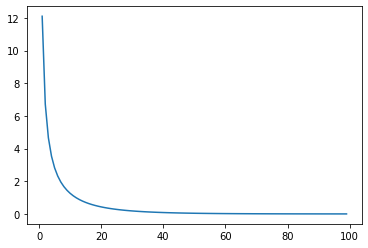

In [39]:
np.random.seed(1337)
alpha = 0.23
beta = 5.35
X = gamma.rvs(scale=1 / beta, a=alpha, size=100)

x = np.linspace(0, 1, 100)
plt.plot(gamma.pdf(x, scale=1 / beta, a=alpha))

Оценим параметры гамма распределения методом моментов:

In [40]:
%%time
boot = 100000
fitted_alphas = []
fitted_betas = []
for i in range(boot):
    # your code here

CPU times: user 8.45 s, sys: 37.9 ms, total: 8.49 s
Wall time: 8.51 s


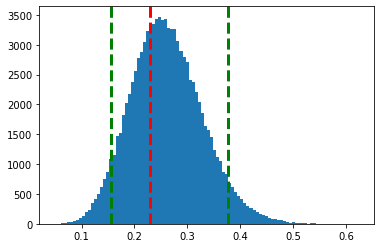

In [41]:
plt.hist(fitted_alphas, bins=100);
alpha_q5, alhpa_q95 = np.percentile(fitted_alphas, [5, 95])
plt.axvline(x=alpha, linewidth=3, color='r',linestyle='--')
plt.axvline(x=alpha_q5, linewidth=3, color='g',linestyle='--')
plt.axvline(x=alhpa_q95, linewidth=3, color='g',linestyle='--')

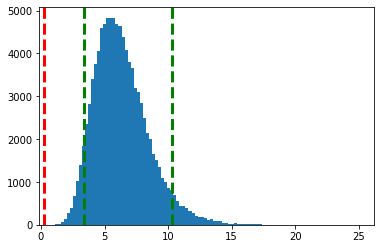

In [42]:
plt.hist(fitted_betas, bins=100);
beta_q5, beta_q95 = np.percentile(fitted_betas, [5, 95])
plt.axvline(x=alpha, linewidth=3, color='r',linestyle='--')
plt.axvline(x=beta_q5, linewidth=3, color='g',linestyle='--')
plt.axvline(x=beta_q95, linewidth=3, color='g',linestyle='--')

In [43]:
print('Alpha error: ', np.mean(np.array(fitted_alphas) - alpha))
print('Beta error: ', np.mean(np.array(fitted_betas) - beta))

Alpha error:  0.030929671872902655
Beta error:  0.9959058477191364


### Метод максимального правдоподобия


MLE(Метод оценки параметров максимума правдоподобия) основывается на максимизации вероятности пронаблюдать выборку.

$$\mathcal{L} = \prod p(x_i|\theta)$$

Будем рассматривать MLE на примере задачи выше.

Уравнение правдоподобия чаще всего записывается с использованием логарифма вероятности, так как в этом случае произведение переходит в сумму, что сильно упрощает жизнь.

$$\mathcal{\log L} = \sum\limits_i \log p(x_i|\theta)$$

  * более хорошая численная стабильность(предотвращает overflow или underflow ошибки);
  * более (относительно)точные градиенты;
  * более гладкая задача(методы оптимизации лучше работают).

Посмотрим на зависимость log-likelihood для задачи с нормальным распределением.

$$\mathcal{L} = \prod\limits_i \frac{\beta^\alpha}{\Gamma(\alpha)} {x_i}^{\alpha-1} \exp(-\beta x_i)$$

$$\mathcal{\log L} = \sum\limits_i \left(  \alpha \log \beta - \log \Gamma(\alpha) - \beta x_i + (\alpha - 1) \log x_i \right)$$

(Обратим внимание насколько простой стала зависимость от $x_i$:)


В большинстве задач, если это не игровые примеры, найти явную форму для оценки параметров с помощью MLE очень сложно.

$$\theta^* = \arg \max \log \mathcal{L}(X, \theta)$$

Берём первую производную по каждому параметра распределения и приравниваем к нулю:

$$ \mathcal{\log L}'(X, \theta) = 0$$

Для параметра $\beta$ гамма-распределения:

$$\mathcal{\log L}'_\beta = \sum\limits_{i} \frac{\alpha}{\beta} - x_i = 0$$

$$\beta = \frac{\alpha N}{\sum\limits_i x_i}$$

Для параметра $\alpha$:

$$\mathcal{\log L}'_\alpha = \sum \log \beta + \log x_i - \psi(\alpha) = 0$$

$$\alpha = \log \beta + \frac{1}{N} \sum \log x_i$$


Итого:

$$\alpha = \log \beta + \frac{1}{N} \sum \log x_i$$

$$\beta = \frac{\alpha N}{\sum\limits_i x_i}$$

Text(0.5, 1.0, 'Likelihood')

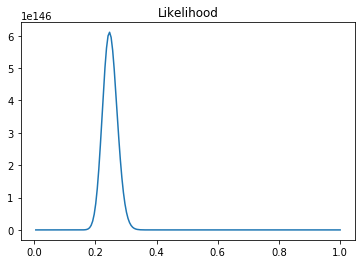

In [44]:
a = np.linspace(0, 1, 200)
plt.plot(
    a, 
    np.prod(gamma.pdf(X[:, np.newaxis], 
                      scale=1 / beta, 
                      a=a), 
            axis=0)
)
plt.title('Likelihood')

Text(0.5, 1.0, 'Log-Likelihood')

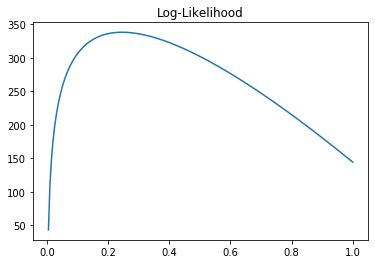

In [45]:
plt.plot(
    a, 
    np.sum(
        gamma.logpdf(
            X[:, np.newaxis], 
            scale=1 / beta, 
            a=a
        ), 
        axis=0
    )
)
plt.title('Log-Likelihood')

In [46]:
alpha, _, beta = gamma.fit(X, floc=0.)
beta = 1 / beta
print(alpha, beta)

0.24900266862933526 5.6614914089605985


Оценим параметры распределения с помощью ММП:

In [47]:
%%time
boot = 100000
alphas = []
betas = []
fitted_alphas = []
fitted_betas = []
for i in range(boot):
    # your code here

CPU times: user 13.9 s, sys: 133 ms, total: 14.1 s
Wall time: 14.2 s


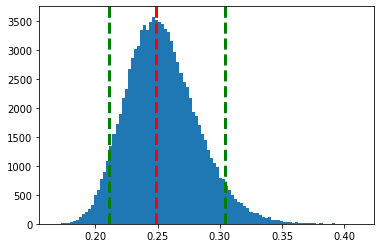

In [48]:
plt.hist(fitted_alphas, bins=100);
alpha_q5, alhpa_q95 = np.percentile(fitted_alphas, [5, 95])
plt.axvline(x=alpha, linewidth=3, color='r',linestyle='--')
plt.axvline(x=alpha_q5, linewidth=3, color='g',linestyle='--')
plt.axvline(x=alhpa_q95, linewidth=3, color='g',linestyle='--')

In [49]:
np.mean(np.array(fitted_alphas) - alpha)

0.004894821415294333

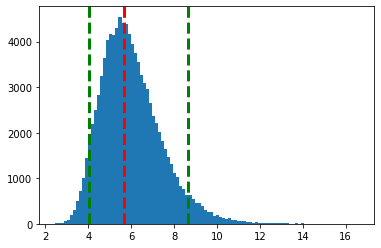

In [50]:
plt.hist(fitted_betas, bins=100);
beta_q5, beta_q95 = np.percentile(fitted_betas, [5, 95])
plt.axvline(x=beta, linewidth=3, color='r',linestyle='--')
plt.axvline(x=beta_q5, linewidth=3, color='g',linestyle='--')
plt.axvline(x=beta_q95, linewidth=3, color='g',linestyle='--')

In [51]:
print('Alpha error: ', np.mean(np.array(fitted_alphas) - alpha))
print('Beta error: ', np.mean(np.array(fitted_betas) - beta))

Alpha error:  0.004894821415294333
Beta error:  0.3509035025433253


### Бутстрап

![https://towardsdatascience.com/an-introduction-to-the-bootstrap-method-58bcb51b4d60](https://miro.medium.com/max/700/1*iH5w0MBdiOlxDOCX6nmqqw.png)


##### Оценки дисперсии функционалов

Пусть есть выборка $X = \{x_i\}_{i=1}^{n}$, некоторый функционал $T_n(X)$ (например, среднее) и мы хотим оценить дисперсию $D_F(T_n)$. Не зная истинного распределения это можно сделать с помощью непараметрического или параметрического бутстрапа.

В непараметрическом бутстрапе оценка дисперсии делается следующим образом:

  1. Рэсемплим выборку с возвращением B раз: $X_1^*, X_2^*, X_B^* \sim X$
  2. Вычисляем $T_1^*, ..., T_B^*$
  3. $$D_F(T_n) \approx v_{boot} = \frac{1}{B - 1} \sum\limits_{b=1}^B \left(T_b^* - \bar{T}^*  \right)^2$$
  

Напишем свой код для оценки дисперсии с помощью бутстрэпа:

In [ ]:
#your code here

In [53]:
print('Error in variance estimation:', np.std(X) / np.sqrt(len(X)) - np.std(T(Xb)))

Error in variance estimation: 0.0001745646458473308


#### Доверительные интервалы на среднее 


В непараметрическом бутстрапе 95% доверительные интервалы считаются следующим образом:

  1. Рэсемплим выборку с возвращением B раз: $X_1^*, X_2^*, X_B^* \sim X$
  2. Вычисляем $T_1^*, ..., T_B^*$
  3. Интервал: [ Percentile($T_1^*, ..., T_B^*$, 2.5), Percentile($T_1^*, ..., T_B^*$, 97.5) ] 
  


Напишем свой код для оценки доверительного интервала среднего:

In [55]:
# your code here

### Формула Байеса и MAP

Пусть есть два события $A$ и $B$. Тогда условная вероятность вводится следующим образом(аксиоматически):

$$p(A|B) = \frac{p(A, B)}{p(B)}$$

Которое показывает какая вероятность наступить событию $A$, если событие $B$ уже наступило. Если $p(A|B)=p(A)$, то говорят что событие $A$ не зависит от $B$. Формула Байеса выводится из формулы условной вероятности в два щелчка:

$$p(A|B) = \frac{p(A, B)}{p(B)} = \frac{p(A) p(B|A)}{p(B)}$$

Воспользуемся байесовским рассуждением. Предположим, что вы подбросили моменту один раз и у вас выпал орёл. Распределение описывается распредлением Бернулли: $p(x=1, q) = q$.

Для выборки $x_1, x_2, \dots, x_N$ правдоподобие записывается следующим образом:

$$p(X, q) = \prod q^{x_i} (1 - q)^{1-x_i}$$

$$\log p(X, q) = \sum\left[ x_i \log q + (1 - x_i) \log( - q) \right]$$

Тогда оценка на параметры высчитывается следующим образом:


$$\frac{\partial }{\partial q} \log p(X, q) = \frac{1}{q} \sum x_i - \frac{1}{1-q} \sum (1 - x_i) = 0$$

Получаем:

$$q = \frac{\sum x_i}{n}$$

В согласии с методом максимума правдоподобия следует, что $p=1$, т.е. следует что монетка всегда будет выпадать орлом.

Такая оценка не очень хорошо согласуется с реальностью. Однако у вас есть некоторое априорное знание. Вы точно знаете, что честная монетка выпадает орлом в 50% случаев. Можем ли мы как-то это использовать? Да, это обеспечивается введением априорного распределения.

В MLE оценка параметров выглядела так:

$$\theta = \mathrm{argmax} \log P(X | \theta) = \mathrm{argmax} \sum \log p(x_i, \theta) $$


В MAP мы говорим, что есть ещё распределение $P(\theta)$, которое появляется из некоторых наших знаний о мире. Тогда MAP записывается следующим образом:

$$
\theta = \mathrm{argmax}  P(X | \theta) P(\theta) = \mathrm{argmax} \left( \sum  \log p(x_i, \theta) \right) P(\theta)
$$

Вернёмся к монете.

Априорное распределени моделируется бета-распределением у которого плотность вероятности выглядит так:

![betapdf](https://wikimedia.org/api/rest_v1/media/math/render/svg/125fdaa41844a8703d1a8610ac00fbf3edacc8e7)

![beta](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f3/Beta_distribution_pdf.svg/531px-Beta_distribution_pdf.svg.png)

В таком случае:

$$p(X, q) p(q) = \prod q^{x_i} (1 - q)^{1-x_i} \frac{1}{B(\alpha, \beta)} q^{\alpha - 1} (1 - q)^{\beta - 1}$$

Лог-вероятность:

$$\log p(X, q) p(q) = (\alpha - 1) \log q + (\beta - 1) \log (1 - q) +  \sum\left[ x_i \log q + (1 - x_i) \log( - q) \right] $$

Производная:


$$\frac{\partial }{\partial q} \log p(X, q) p(q) = $$

$$ = \frac{1}{q} \sum x_i - \frac{1}{1-q} \sum (1 - x_i) + \frac{\alpha - 1}{q} - \frac{\beta - 1}{1 - q} = 0$$


Решая уравнение выше получаем:

$$\mu = \frac{\sum x_i + \alpha - 1}{n + \beta + \alpha - 2}$$


Пусть наш приор $\alpha=\beta=2$(см. картинку выше).

Тогда при одном броске монеты получаем следующую оценку:

$$q = \frac{1 + 2 - 1}{1 + 2 + 2 - 2} = \frac{2}{3} \approx 0.66$$